In [63]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Define the ticker symbol
ticker = "ES=F"

# S&P 500 Futures financial information
# January 1, 2025 to today
data = yf.download(ticker,start='2000-01-01', end='2025-09-18')
data.head(10)

/var/folders/tc/3wfpy3sn34v9f5ylzj41xkdm0000gn/T/ipykernel_46961/261729296.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker,start='2000-01-01', end='2025-09-18')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,ES=F,ES=F,ES=F,ES=F,ES=F
Date,,,,,
2000-09-18,1467.50,1489.75,1462.25,1485.25,104794
2000-09-19,1478.50,1482.75,1466.75,1467.00,103371
2000-09-20,1469.50,1480.50,1450.25,1478.75,109667
2000-09-21,1469.50,1474.00,1455.50,1470.25,98528
2000-09-22,1468.50,1471.00,1436.75,1454.75,97416
2000-09-25,1461.00,1477.75,1455.50,1469.50,85491
2000-09-26,1443.00,1467.00,1442.50,1461.00,99803
2000-09-27,1446.75,1456.00,1438.25,1444.00,101996


In [3]:
type(data) 

pandas.core.frame.DataFrame

In [4]:
# Grabbing a specific column and giving it a new title
SP_close = data['Close']['ES=F']

In [5]:
type(SP_close)

pandas.core.series.Series

In [6]:
SP_close.head()

Date
2000-09-18    1467.5
2000-09-19    1478.5
2000-09-20    1469.5
2000-09-21    1469.5
2000-09-22    1468.5
Name: ES=F, dtype: float64

In [7]:
SP_close.tail()

Date
2025-09-11    6592.50
2025-09-12    6588.25
2025-09-15    6621.50
2025-09-16    6610.75
2025-09-17    6601.25
Name: ES=F, dtype: float64

In [8]:
SP_close.index

DatetimeIndex(['2000-09-18', '2000-09-19', '2000-09-20', '2000-09-21',
               '2000-09-22', '2000-09-25', '2000-09-26', '2000-09-27',
               '2000-09-28', '2000-09-29',
               ...
               '2025-09-04', '2025-09-05', '2025-09-08', '2025-09-09',
               '2025-09-10', '2025-09-11', '2025-09-12', '2025-09-15',
               '2025-09-16', '2025-09-17'],
              dtype='datetime64[ns]', name='Date', length=6313, freq=None)

<Axes: xlabel='Date'>

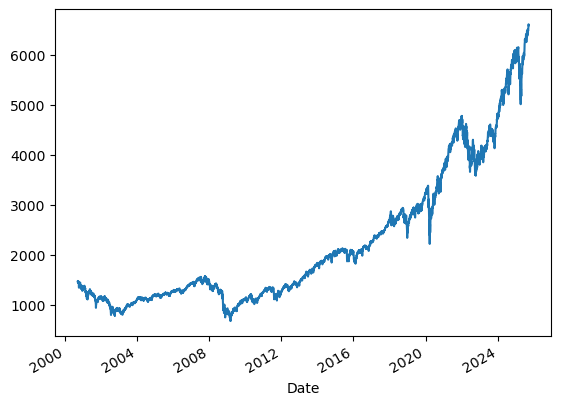

In [9]:
SP_close.plot()

In [19]:
SP_close.head(10)

Date
2000-09-18    1467.50
2000-09-19    1478.50
2000-09-20    1469.50
2000-09-21    1469.50
2000-09-22    1468.50
2000-09-25    1461.00
2000-09-26    1443.00
2000-09-27    1446.75
2000-09-28    1476.00
2000-09-29    1454.00
Name: ES=F, dtype: float64

In [25]:
SP_close["2000-09-20"]

np.float64(1469.5)

In [41]:
# Grabbing a specific Data range from the set
SP_close_24to25 = SP_close["20240101" : "20250918"]

In [45]:
SP_close_24to25.head()

Date
2024-01-02    4787.25
2024-01-03    4746.50
2024-01-04    4729.50
2024-01-05    4734.75
2024-01-08    4801.25
Name: ES=F, dtype: float64

In [47]:
SP_close_24to25.tail()

Date
2025-09-11    6592.50
2025-09-12    6588.25
2025-09-15    6621.50
2025-09-16    6610.75
2025-09-17    6601.25
Name: ES=F, dtype: float64

<Axes: xlabel='Date'>

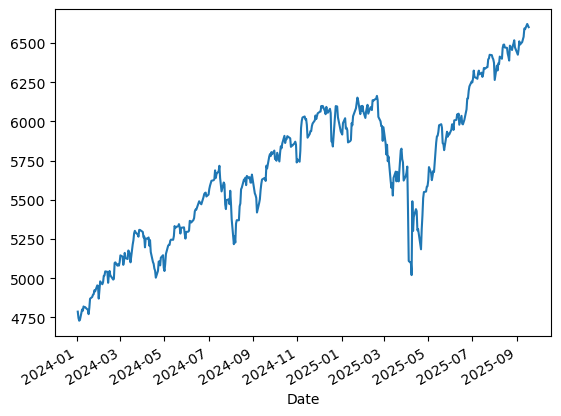

In [51]:
SP_close_24to25.plot()

In [53]:
SP_close.head()

Date
2000-09-18    1467.5
2000-09-19    1478.5
2000-09-20    1469.5
2000-09-21    1469.5
2000-09-22    1468.5
Name: ES=F, dtype: float64

In [73]:
# .shift(1) aligns each value with the previous day's Close (needed for return calculation)
SP_close.shift()

Date
2000-09-18        NaN
2000-09-19    1467.50
2000-09-20    1478.50
2000-09-21    1469.50
2000-09-22    1469.50
               ...   
2025-09-11    6539.75
2025-09-12    6592.50
2025-09-15    6588.25
2025-09-16    6621.50
2025-09-17    6610.75
Name: ES=F, Length: 6313, dtype: float64

In [81]:
# Calculate daily log returns (%): compares today's Close to the previous day's using .shift(1)
SP_returns = 100 * np.log(SP_close/SP_close.shift(1))

In [83]:
SP_returns.head(10)

Date
2000-09-18         NaN
2000-09-19    0.746779
2000-09-20   -0.610585
2000-09-21    0.000000
2000-09-22   -0.068074
2000-09-25   -0.512034
2000-09-26   -1.239685
2000-09-27    0.259538
2000-09-28    2.001606
2000-09-29   -1.501735
Name: ES=F, dtype: float64

<Axes: xlabel='Date'>

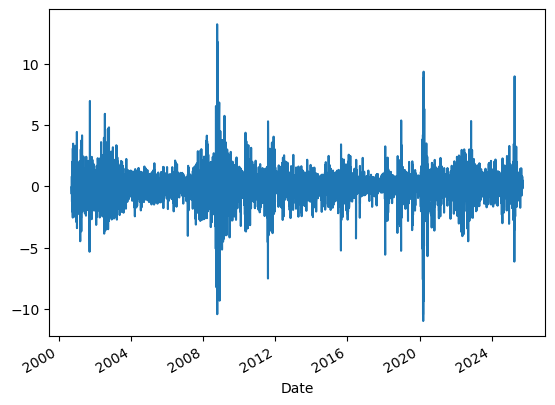

In [85]:
SP_returns.plot()